In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression         # 79% accuracy
from sklearn.naive_bayes import GaussianNB

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
data.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

In [7]:
data.isna().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [9]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# # to fill the null values in the data 

In [10]:
# to fill the null values in the data 
data.fillna(data.median(),inplace = True)

In [11]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0


<Axes: title={'center': 'Age'}>

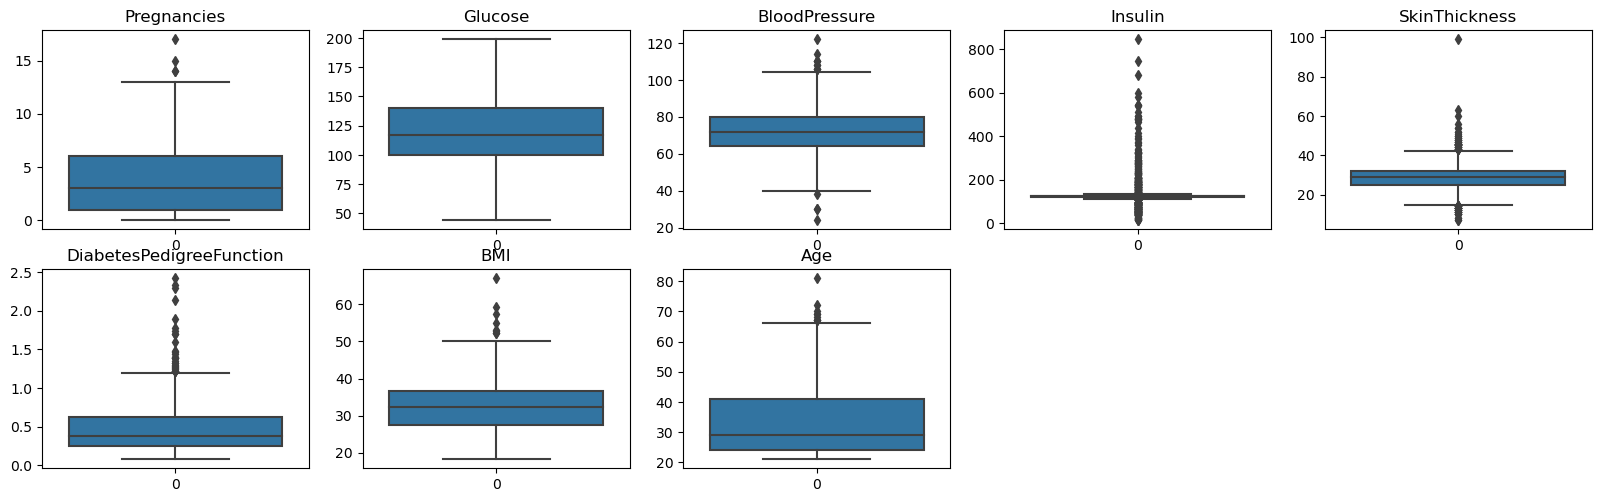

In [13]:
plt.figure(figsize=(20,15))                 
# first and second value are length and breadth of the graph & 3rd value is the no. of graph
plt.subplot(5,5,1)   
plt.title('Pregnancies')
sns.boxplot(data['Pregnancies'] )

plt.subplot(5,5,2)
plt.title('Glucose')
sns.boxplot(data['Glucose'] )

plt.subplot(5,5,3)   
plt.title('BloodPressure')
sns.boxplot(data['BloodPressure'] )

plt.subplot(5,5,4)   
plt.title('Insulin')
sns.boxplot(data['Insulin'])

plt.subplot(5,5,5)   
plt.title('SkinThickness')
sns.boxplot(data['SkinThickness'])

plt.subplot(5,5,6)   
plt.title('DiabetesPedigreeFunction')
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(5,5,7)   
plt.title('BMI')
sns.boxplot(data['BMI'])

plt.subplot(5,5,8)   
plt.title('Age')
sns.boxplot(data['Age'])


# To remove outliers

In [14]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper=data['Pregnancies'].quantile(0.95))
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05),upper=data['BloodPressure'].quantile(0.95))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05),upper=data['Insulin'].quantile(0.95))
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper=data['SkinThickness'].quantile(0.95))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05),upper=data['BMI'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))

<Axes: title={'center': 'Age'}>

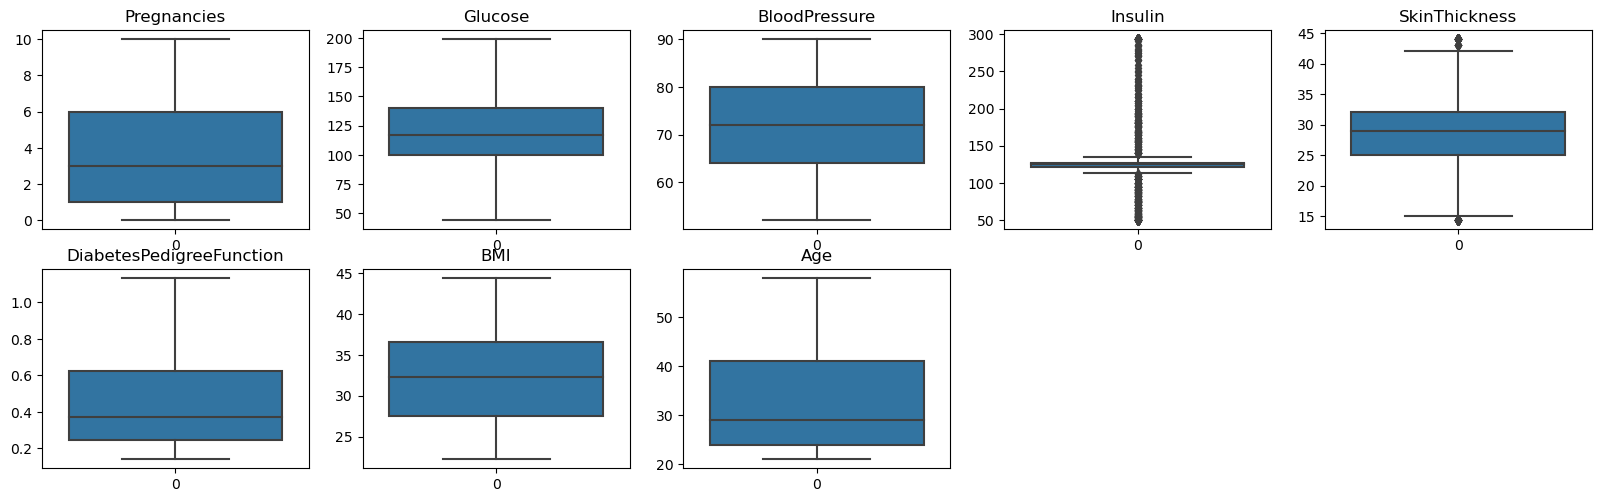

In [15]:
plt.figure(figsize=(20,15))                 
# first and second value are length and breadth of the graph & 3rd value is the no. of graph
plt.subplot(5,5,1)   
plt.title('Pregnancies')
sns.boxplot(data['Pregnancies'] )

plt.subplot(5,5,2)
plt.title('Glucose')
sns.boxplot(data['Glucose'] )

plt.subplot(5,5,3)   
plt.title('BloodPressure')
sns.boxplot(data['BloodPressure'] )

plt.subplot(5,5,4)   
plt.title('Insulin')
sns.boxplot(data['Insulin'])

plt.subplot(5,5,5)   
plt.title('SkinThickness')
sns.boxplot(data['SkinThickness'])

plt.subplot(5,5,6)   
plt.title('DiabetesPedigreeFunction')
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(5,5,7)   
plt.title('BMI')
sns.boxplot(data['BMI'])

plt.subplot(5,5,8)   
plt.title('Age')
sns.boxplot(data['Age'])


# still outliers in insulin and skin thickness'

In [16]:
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.24),upper=data['Insulin'].quantile(0.77))
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.06),upper=data['SkinThickness'].quantile(0.93))


<Axes: title={'center': 'SkinThickness'}>

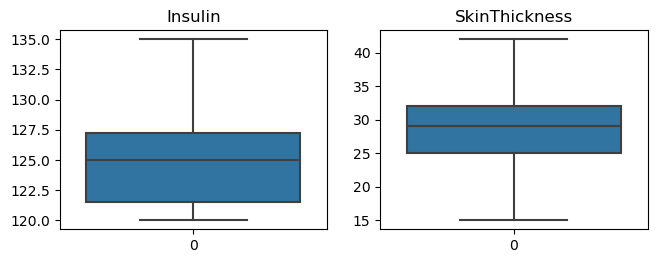

In [17]:
plt.figure(figsize=(20,15)) 
plt.subplot(5,5,1)   
plt.title('Insulin')
sns.boxplot(data['Insulin'])


plt.subplot(5,5,2)   
plt.title('SkinThickness')
sns.boxplot(data['SkinThickness'])

# now the data is free from outliers

<Axes: ylabel='count'>

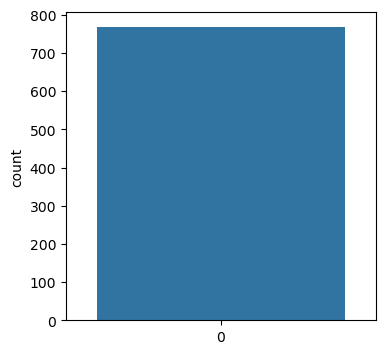

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(data['Outcome'])

# Training The model 

In [19]:
c = data.iloc[:,0:8]
y = data.iloc[:,8:]


In [20]:
c_train,c_test,y_train,y_test = train_test_split(c,y,test_size = 0.2)

# Logistic regression

In [21]:
logR = LogisticRegression()
logR.fit(c_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred = logR.predict(c_test)

In [23]:
accuracy_score(y_test,y_pred)

0.7727272727272727

# Naive Byes - GaussianNB

In [24]:
model = GaussianNB()
model.fit(c_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [25]:
predict = model.predict(c_test)

In [26]:
accuracy_score(predict,y_test)

0.7402597402597403

# **HYPERPARAMETER TUNING IN KERAS**

# **PIMA INDAINS DIABETES DATASETS**

In [27]:
import pandas as pd
import numpy as np 

In [28]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [30]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
x= scaler.fit_transform(x)
x.shape

(768, 8)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [34]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense , Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [35]:
model = Sequential()
model.add(Dense(32 , activation = 'relu',input_dim=8))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics =['accuracy'])

In [36]:
model.fit(x_train,y_train,batch_size=32,epochs =10,validation_data = (x_test,y_test))

Epoch 1/10
20/20 [==============================] - 1s 16ms/step - loss: 0.7033 - accuracy: 0.5098 - val_loss: 0.6553 - val_accuracy: 0.6039
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6645 - val_loss: 0.6075 - val_accuracy: 0.6753
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6087 - accuracy: 0.6922 - val_loss: 0.5745 - val_accuracy: 0.7208
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5783 - accuracy: 0.7296 - val_loss: 0.5489 - val_accuracy: 0.7532
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.7427 - val_loss: 0.5307 - val_accuracy: 0.7922
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5370 - accuracy: 0.7704 - val_loss: 0.5149 - val_accuracy: 0.7987
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5220 - accuracy: 0.7736 - val_loss: 0.5030 - val_accuracy: 0.7922
Epoch 8/10
20/20 [=

* approprit optimizer
* no. of nodes
* no. of layers

# for best OPTIMIZERS

In [37]:
import kerastuner as kt

/tmp/ipykernel_32/1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [38]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32,activation = 'relu',input_dim =8))
    model.add(Dense(1,activation = 'sigmoid'))
    
    optimizers = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer= optimizers,loss = 'binary_crossentropy',metrics = ['accuracy'])
    
    return model

In [39]:
tuner = kt.RandomSearch(build_model,
                       objective = 'val_accuracy',
                       max_trials = 5)

In [40]:
tuner.search(x_train,y_train,epochs =5 ,validation_data=(x_test,y_test))

Trial 4 Complete [00h 00m 02s]
val_accuracy: 0.7337662577629089

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 08s


In [41]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [42]:
model = tuner.get_best_models(num_models =1)[0]

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(x_train,y_train,batch_size=32,epochs = 100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 13ms/step - loss: 0.5832 - accuracy: 0.7427 - val_loss: 0.5623 - val_accuracy: 0.7662
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.7508 - val_loss: 0.5380 - val_accuracy: 0.7727
Epoch 9/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5324 - accuracy: 0.7590 - val_loss: 0.5216 - val_accuracy: 0.7792
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.7736 - val_loss: 0.5068 - val_accuracy: 0.7792
Epoch 11/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5035 - accuracy: 0.7687 - val_loss: 0.4962 - val_accuracy: 0.7662
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7720 - val_loss: 0.4892 - val_accuracy: 0.7727
Epoch 13/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4860 - accuracy: 0.7752 - val_loss: 0.4829 - val_accuracy: 0.7727
Epoch 14

# NO. OF NEURONS IN A LAYER

In [45]:
def build_model(hp):
    
    model = Sequential()
    
    units = hp.Int('unit' ,min_value= 8,max_value=128,step=8)   # it will take 8 , 16 , 24 , 32 .... 128 everytime 
    
    model.add(Dense(units=units,activation = 'relu',input_dim =8))
    model.add(Dense(1,activation ='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [46]:
tuner = kt.RandomSearch(build_model,
                       objective = 'val_accuracy',
                       max_trials = 5,
                       directory = 'mydir')

In [47]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 09s


In [48]:
tuner.get_best_hyperparameters()[0].values

{'unit': 88}

In [49]:
model =tuner.get_best_models(num_models=1)[0]

In [50]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6)

Epoch 7/100
20/20 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7720
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7720
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7752
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7818
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.7769
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7801
Epoch 13/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7752
Epoch 14/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7769
Epoch 15/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.7769
Epoch 16/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.7785
Epo

# How to selesct no. of LAYERS

In [51]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(96,activation='relu',input_dim=8))
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(96,activation='relu'))
        
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [52]:
tuner = kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       directory = '2_layers')

In [53]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.8246753215789795
Total elapsed time: 00h 00m 09s


In [54]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10}

In [55]:
model = tuner.get_best_models(num_models=1)[0]

In [56]:
model.fit(x_train,y_train,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 2s 19ms/step - loss: 0.4359 - accuracy: 0.8013 - val_loss: 0.5243 - val_accuracy: 0.7987
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.7964 - val_loss: 0.5248 - val_accuracy: 0.7987
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4092 - accuracy: 0.8208 - val_loss: 0.5994 - val_accuracy: 0.7857
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8192 - val_loss: 0.6411 - val_accuracy: 0.7532
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4018 - accuracy: 0.8225 - val_loss: 0.5773 - val_accuracy: 0.8247
Epoch 12/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3681 - accuracy: 0.8469 - val_loss: 0.4744 - val_accuracy: 0.8052
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3434 - accuracy: 0.8502 - val_loss: 0.5159 - val_accuracy: 0.7403
Epoch 14

# ALL IN ONE GO

In [57]:
def build_model(hp):
    model = Sequential()
    
    counter =0
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if(counter==0):
            model.add(
                Dense(
                    hp.Int('units'+str(i), min_value=8,max_value=128,step=8),
                    activation= hp.Choice('activation' + str(i) , values =['relu','tanh','sigmoid']),
                    input_dim =8
                )
            )
            model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i), min_value=8,max_value=128,step=8),
                    activation= hp.Choice('activation' + str(i) , values =['relu','tanh','sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout' + str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    counter+=1

    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam']),
                 loss = 'binary_crossentropy',metrics=['accuracy'])
    
    return model

In [58]:
tuner = kt.RandomSearch(build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       directory='final2')

In [59]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 00m 05s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7337662577629089
Total elapsed time: 00h 00m 10s


In [60]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 40,
 'activation0': 'relu',
 'dropout0': 0.4,
 'optimizer': 'nadam'}

In [61]:
model = tuner.get_best_models(num_models=1)[0]

In [62]:
model.fit(x_train,y_train,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 17ms/step - loss: 0.5341 - accuracy: 0.7313 - val_loss: 0.5263 - val_accuracy: 0.7403
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 0.7182 - val_loss: 0.5168 - val_accuracy: 0.7468
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5204 - accuracy: 0.7199 - val_loss: 0.5080 - val_accuracy: 0.7662
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5246 - accuracy: 0.7394 - val_loss: 0.5018 - val_accuracy: 0.7597
Epoch 11/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7443 - val_loss: 0.4961 - val_accuracy: 0.7727
Epoch 12/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7573 - val_loss: 0.4916 - val_accuracy: 0.7727
Epoch 13/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5043 - accuracy: 0.7394 - val_loss: 0.4877 - val_accuracy: 0.7727
Epoch 14